In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    })

colors = [(0.2298057,0.298717966,0.753683153),
          (0.3634607953411765,0.4847836818509804,0.9010188868941177),
          (0.5108243242509803,0.6493966148235294,0.9850787763764707),
          (0.6672529243333334,0.7791764569999999,0.992959213),
          (0.8049647588235295,0.8516661605568627,0.9261650744313725),
          (0.9193759889058823,0.8312727235294118,0.7828736304470588),
          (0.968203399,0.7208441,0.6122929913333334),
          (0.9440545734235294,0.5531534787490197,0.4355484903137255),
          (0.8523781350078431,0.34649194649411763,0.2803464686980392),
          (0.705673158,0.01555616,0.150232812)]
colors = ['b','r','k','g','m','c','tab:brown','tab:orange','tab:pink','tab:gray','tab:olive','tab:purple']

markers = ["v","o","^","1","*",">","d","<","s","P","X"]
FONTSIZE = 22

Adaptation training loss

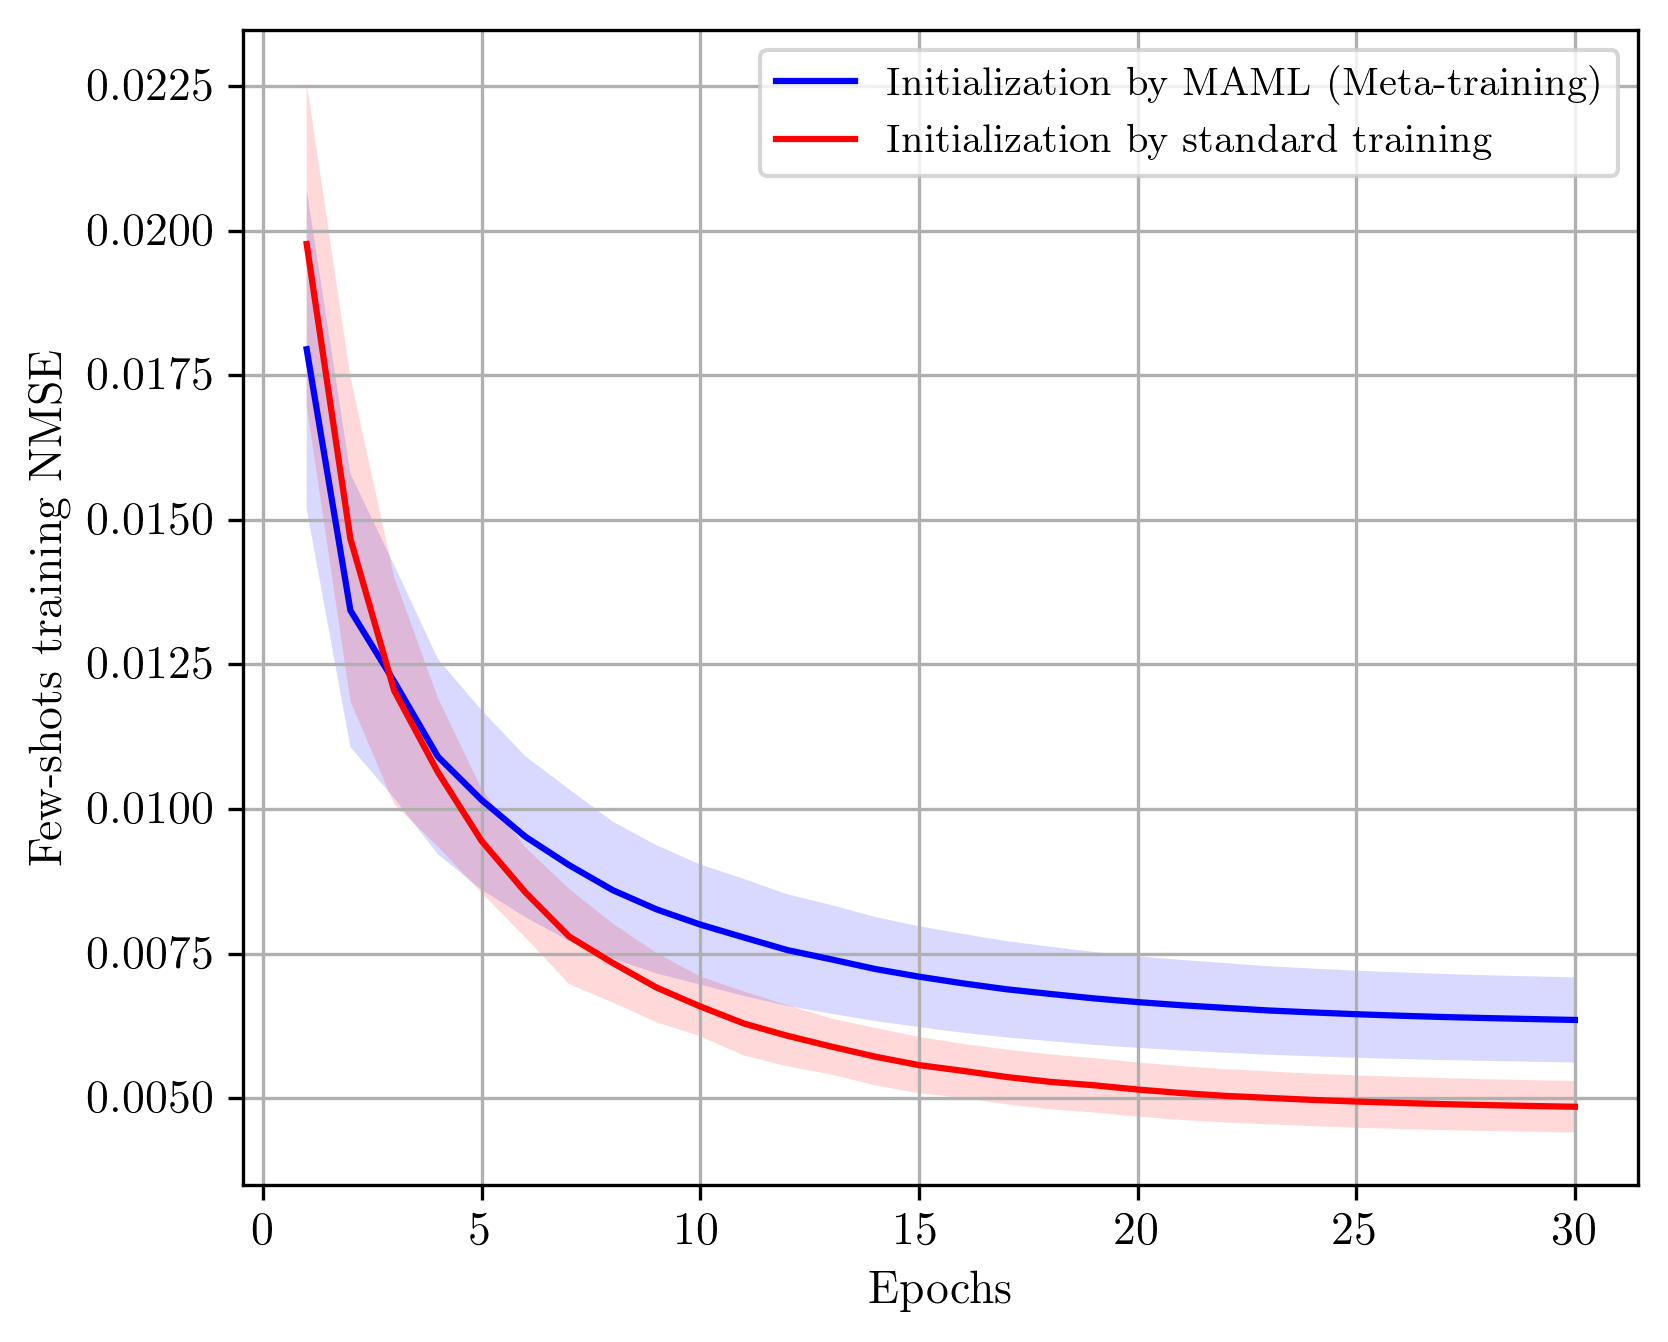

In [2]:
data1 = []
data2 = []

for i in range(1,6):
    # read csv
    filename1 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1.1 (E10.2)/run-metaMRI_save_E_sup_mamlE10.2_5few-adapt_lrCA0.001_Q3_seed{i}-tag-Adaptation training NMSE.csv"
    df1 = pd.read_csv(filename1)
    # extract value
    values1 = df1['Value'].values
    data1.append(values1)
    # read csv
    filename2 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1.1 (E10.2)/run-metaMRI_save_E_sup_standardE10.2_5few-adapt_lrCA0.001_Q3_seed{i}-tag-Adaptation training NMSE.csv"
    df2 = pd.read_csv(filename2)
    # extract value
    values2 = df2['Value'].values
    data2.append(values2)

    
# mean and std
mean_values1 = np.mean(data1, axis=0)
std_values1 = np.std(data1, axis=0)
mean_values2 = np.mean(data2, axis=0)
std_values2 = np.std(data2, axis=0)

plt.figure(figsize=(6,5),dpi=300)

# alpha: transparency 
plt.plot(range(1, 31), mean_values1, color=colors[0], label='Initialization by MAML (Meta-training)')
plt.fill_between(range(1, 31), mean_values1 - std_values1, mean_values1 + std_values1, color=colors[0], alpha=0.15, edgecolor=None)
plt.plot(range(1, 31), mean_values2, color=colors[1], label='Initialization by standard training')
plt.fill_between(range(1, 31), mean_values2 - std_values2, mean_values2 + std_values2, color=colors[1], alpha=0.15, edgecolor=None)

plt.tick_params(axis='both', which='major', labelsize=FONTSIZE/2)
plt.tick_params(axis='both', which='minor', labelsize=(FONTSIZE-2)/2)
plt.xlabel('Epochs',fontsize=FONTSIZE/2)
plt.ylabel('Few-shots training NMSE',fontsize=FONTSIZE/2)
#plt.title('Out-of-distribution Q1 Adaptation', fontsize = FONTSIZE/2)
plt.legend(fontsize = (FONTSIZE-3)/2)
plt.grid(True)
plt.show()


Testing NMSE

In [3]:
data1 = []
data2 = []

for i in range(1,6):
    # read csv
    filename1 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1.1 (E10.2)/run-metaMRI_save_E_sup_mamlE10.2_5few-adapt_lrCA0.001_Q3_seed{i}-tag-Testing NMSE.csv"
    df1 = pd.read_csv(filename1)
    # extract value
    values1 = df1['Value'].values
    data1.append(values1)
    # read csv
    filename2 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1.1 (E10.2)/run-metaMRI_save_E_sup_standardE10.2_5few-adapt_lrCA0.001_Q3_seed{i}-tag-Testing NMSE.csv"
    df2 = pd.read_csv(filename2)
    # extract value
    values2 = df2['Value'].values
    data2.append(values2)

    
# mean and std
mean_values1 = np.mean(data1, axis=0)
std_values1 = np.std(data1, axis=0)
mean_values2 = np.mean(data2, axis=0)
std_values2 = np.std(data2, axis=0)


min_index2 = np.argmin(mean_values2)
print('Standard min NMSE: ',  round(mean_values2[min_index2], 4))
print('Standard stand diviation: ', round(std_values2[min_index2], 4))
print('Standard epoch: ', min_index2)

min_index1 = np.argmin(mean_values1)
print('MAML min NMSE: ',  round(mean_values1[min_index1], 4))
print('MAML stand diviation: ', round(std_values1[min_index1], 4))
print('MAML epoch: ', min_index1)

Standard min NMSE:  0.0173
Standard stand diviation:  0.0003
Standard epoch:  11
MAML min NMSE:  0.0166
MAML stand diviation:  0.0002
MAML epoch:  6


In [4]:
print('Standard init NMSE: ',  round(mean_values2[0], 4))
print('Standard stand diviation: ', round(std_values2[0], 4))

print('MAML init NMSE: ',  round(mean_values1[0], 4))
print('MAML stand diviation: ', round(std_values1[0], 4))

Standard init NMSE:  0.0239
Standard stand diviation:  0.0
MAML init NMSE:  0.0212
MAML stand diviation:  0.0


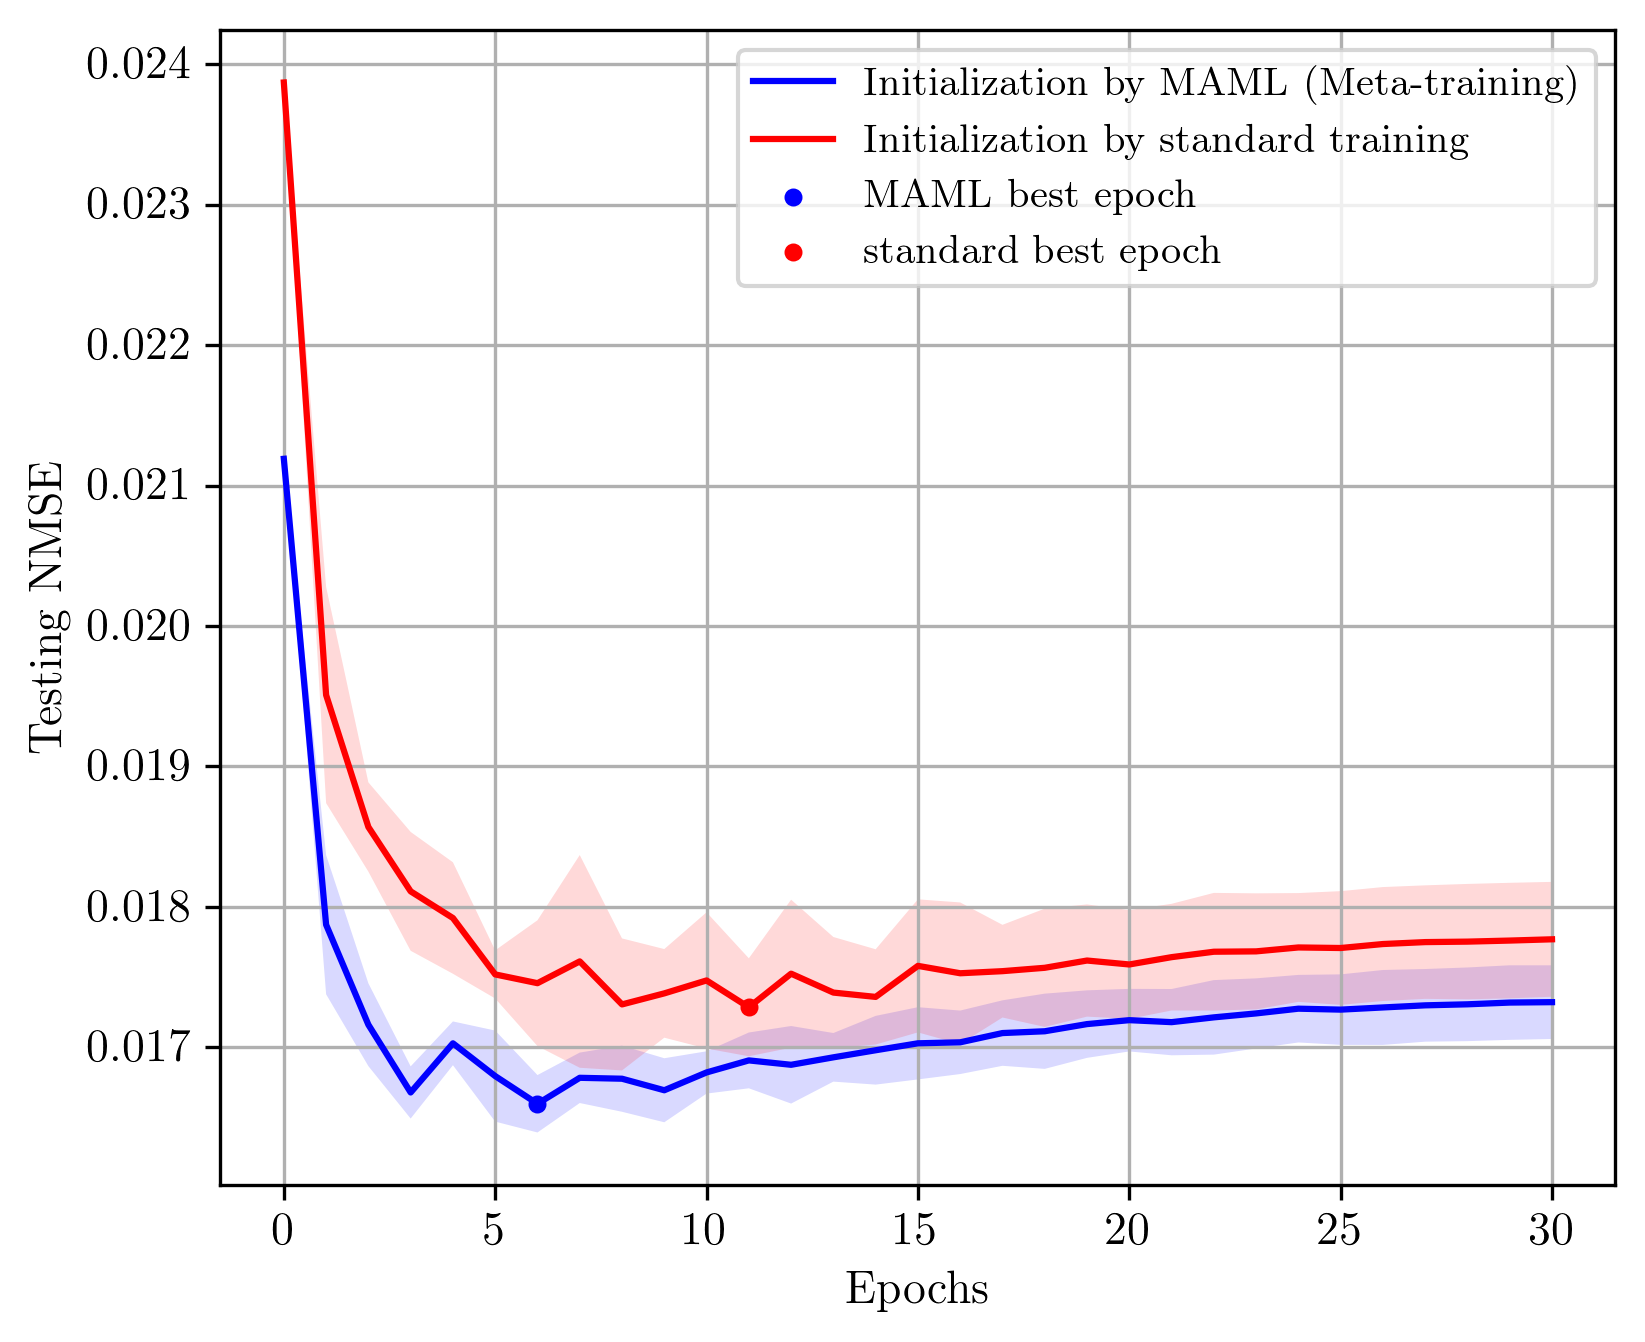

In [5]:
plt.figure(figsize=(6,5),dpi=300)

# alpha: transparency 
plt.plot(range(0, 31), mean_values1, color=colors[0], label='Initialization by MAML (Meta-training)')
plt.fill_between(range(0, 31), mean_values1 - std_values1, mean_values1 + std_values1, color=colors[0], alpha=0.15, edgecolor=None)
plt.plot(range(0, 31), mean_values2, color=colors[1], label='Initialization by standard training')
plt.fill_between(range(0, 31), mean_values2 - std_values2, mean_values2 + std_values2, color=colors[1], alpha=0.15, edgecolor=None)
plt.scatter(min_index1, mean_values1[min_index1], color=colors[0], s=FONTSIZE/2, label = 'MAML best epoch')
plt.scatter(min_index2, mean_values2[min_index2], color=colors[1], s=FONTSIZE/2, label = 'standard best epoch')

plt.tick_params(axis='both', which='major', labelsize=FONTSIZE/2)
plt.tick_params(axis='both', which='minor', labelsize=(FONTSIZE-2)/2)
plt.xlabel('Epochs',fontsize=FONTSIZE/2)
plt.ylabel('Testing NMSE',fontsize=FONTSIZE/2)
#plt.title('Out-of-distribution Q3 Adaptation', fontsize = FONTSIZE/2)
plt.legend(fontsize = (FONTSIZE-3)/2)
plt.grid(True)
plt.show()

Testing SSIM

In [6]:
data1 = []
data2 = []

for i in range(1,6):
    # read csv
    filename1 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1.1 (E10.2)/run-metaMRI_save_E_sup_mamlE10.2_5few-adapt_lrCA0.001_Q3_seed{i}-tag-Testing SSIM.csv"
    df1 = pd.read_csv(filename1)
    # extract value
    values1 = df1['Value'].values
    data1.append(values1)
    # read csv
    filename2 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1.1 (E10.2)/run-metaMRI_save_E_sup_standardE10.2_5few-adapt_lrCA0.001_Q3_seed{i}-tag-Testing SSIM.csv"
    df2 = pd.read_csv(filename2)
    # extract value
    values2 = df2['Value'].values
    data2.append(values2)

    
# mean and std
mean_values1 = np.mean(data1, axis=0)
std_values1 = np.std(data1, axis=0)
mean_values2 = np.mean(data2, axis=0)
std_values2 = np.std(data2, axis=0)

print('Standard init SSIM: ',  round(mean_values2[0], 4))
print('Standard stand diviation: ', round(std_values2[0], 4))

print('MAML init SSIM: ',  round(mean_values1[0], 4))
print('MAML stand diviation: ', round(std_values1[0], 4))

Standard init SSIM:  0.8505
Standard stand diviation:  0.0
MAML init SSIM:  0.8615
MAML stand diviation:  0.0


In [7]:
print('BEST performance')
print('Standard min SSIM: ',  round(mean_values2[min_index2], 4))
print('Standard stand diviation: ', round(std_values2[min_index2], 4))

print('MAML min SSIM: ',  round(mean_values1[min_index1], 4))
print('MAML stand diviation: ', round(std_values1[min_index1], 4))

BEST performance
Standard min SSIM:  0.881
Standard stand diviation:  0.0012
MAML min SSIM:  0.8836
MAML stand diviation:  0.0007


In [8]:
max_index2 = np.argmax(mean_values2)
print('Standard min NMSE: ',  round(mean_values2[max_index2], 4))
print('Standard stand diviation: ', round(std_values2[max_index2], 4))
print('Standard epoch: ', max_index2)

max_index1 = np.argmax(mean_values1)
print('MAML min NMSE: ',  round(mean_values1[max_index1], 4))
print('MAML stand diviation: ', round(std_values1[max_index1], 4))
print('MAML epoch: ', max_index1)

Standard min NMSE:  0.8815
Standard stand diviation:  0.0012
Standard epoch:  8
MAML min NMSE:  0.8836
MAML stand diviation:  0.0007
MAML epoch:  6


In [72]:
max_index1 = 8

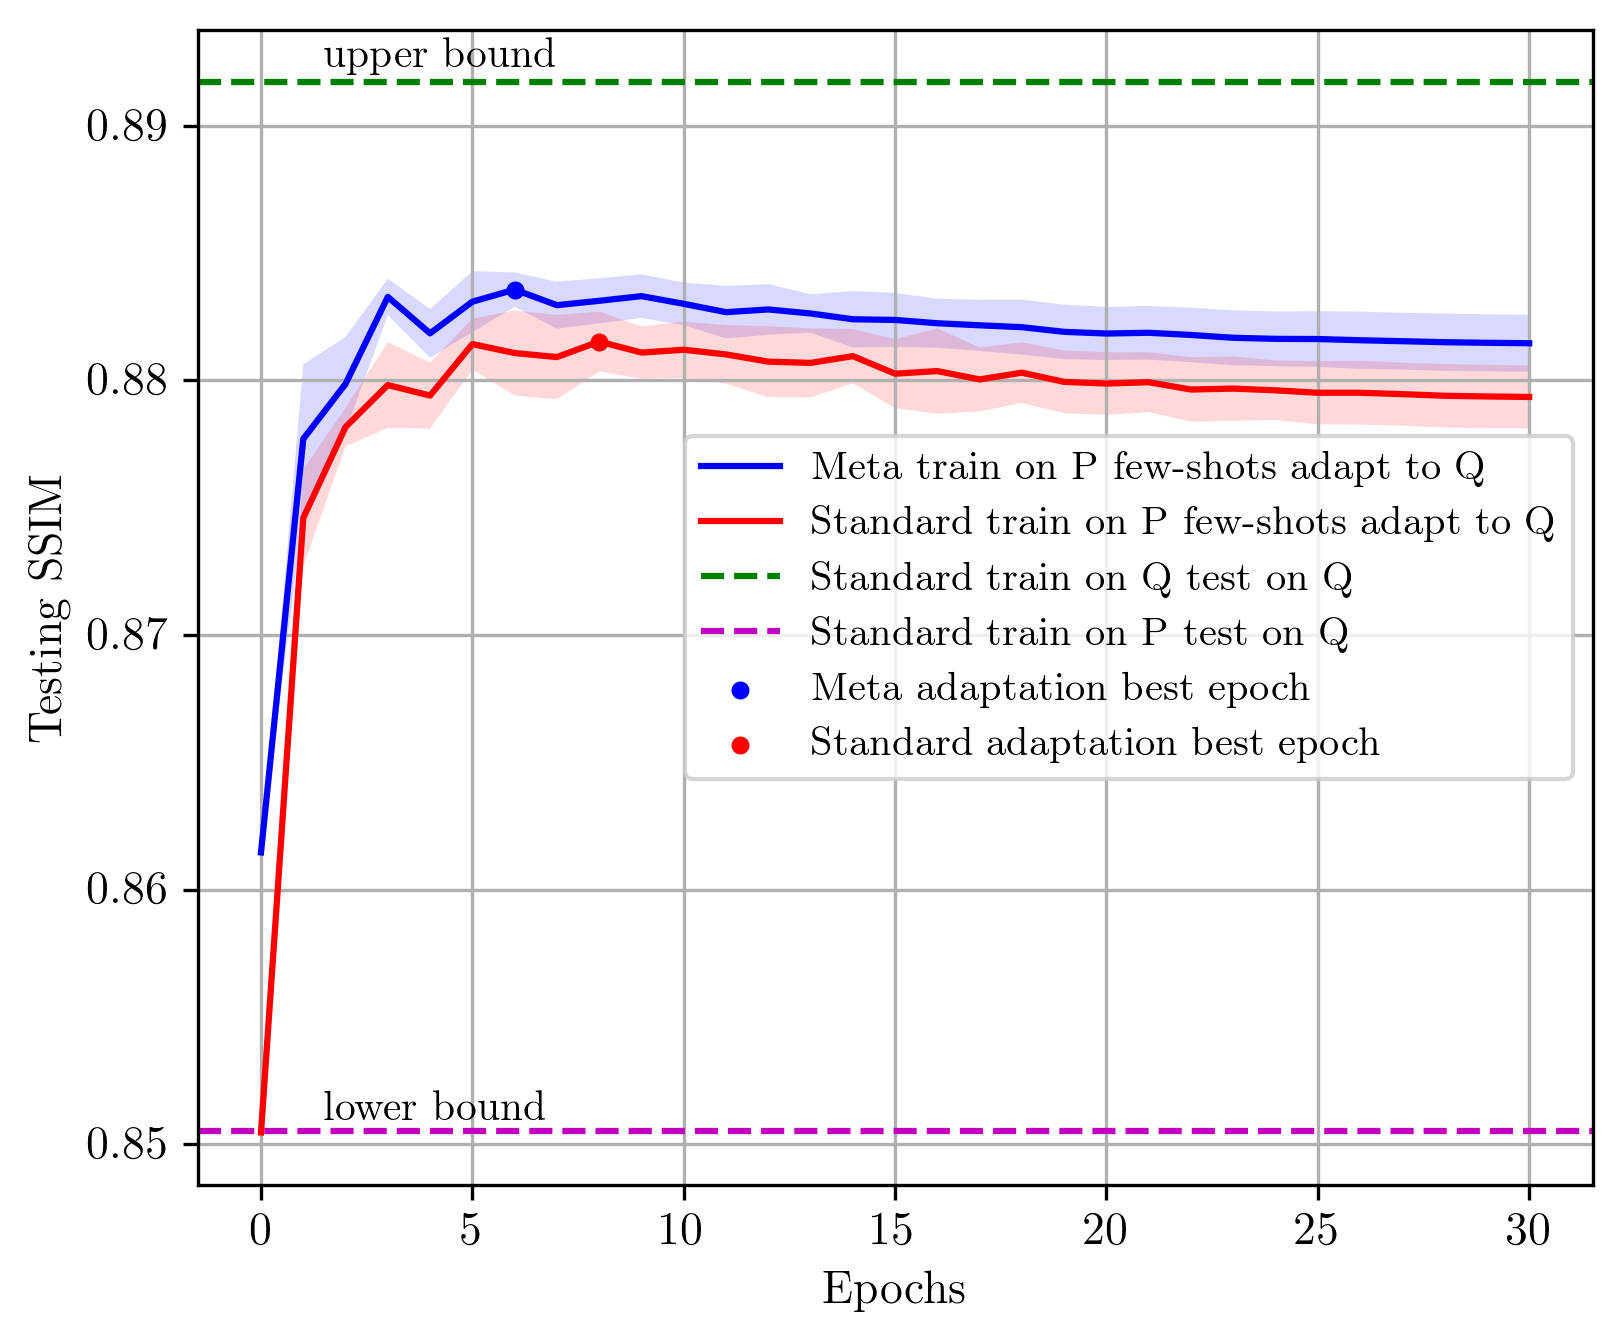

In [14]:
upper_bound = 0.8917
lower_bound = 0.8505

plt.figure(figsize=(6,5),dpi=300)
plt.grid(True, zorder=1)    # grid on bottom
# alpha: transparency 
plt.plot(range(0, 31), mean_values1, color=colors[0], label='Meta train on P few-shots adapt to Q')
plt.fill_between(range(0, 31), mean_values1 - std_values1, mean_values1 + std_values1, color=colors[0], alpha=0.15, edgecolor=None)
plt.plot(range(0, 31), mean_values2, color=colors[1], label='Standard train on P few-shots adapt to Q')
plt.fill_between(range(0, 31), mean_values2 - std_values2, mean_values2 + std_values2, color=colors[1], alpha=0.15, edgecolor=None)

plt.axhline(y = upper_bound, color=colors[3], linestyle='--', label='Standard train on Q test on Q ')   # upper bound
plt.text(1.5, upper_bound+0.0006, 'upper bound', color=colors[2])
plt.axhline(y = lower_bound, color=colors[4], linestyle='--', label='Standard train on P test on Q')   # lower bound
plt.text(1.5, lower_bound+0.0004, 'lower bound', color=colors[2])

plt.scatter(max_index1, mean_values1[max_index1], color=colors[0], s=FONTSIZE/2, label = 'Meta adaptation best epoch', zorder=2)
plt.scatter(max_index2, mean_values2[max_index2], color=colors[1], s=FONTSIZE/2, label = 'Standard adaptation best epoch', zorder=2)

plt.tick_params(axis='both', which='major', labelsize=FONTSIZE/2)
plt.tick_params(axis='both', which='minor', labelsize=(FONTSIZE-2)/2)
plt.xlabel('Epochs',fontsize=FONTSIZE/2)
plt.ylabel('Testing SSIM',fontsize=FONTSIZE/2)
#plt.title('Out-of-distribution Q3 Adaptation', fontsize = FONTSIZE/2)
plt.legend(fontsize = (FONTSIZE-3)/2)

plt.show()